In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Init the global variables
LOWER = -1    ## lower limit of the function
UPPER = 2     ## Upper limit of the function
SIZE = 10     ## Size of the population

In [3]:
#Function to be profiled
def function(x):
    return x * np.sin(10 * np.pi * x) + 2

In [4]:
#Generating the intial / first generation of the population
##number of bits to represent - resolution
def generate_population(size = SIZE, resolution = 7):
    # This function will generate the population in terms of binary
    population = []
    for _ in range(size):
        population += [np.array([np.random.randint(1000) % 2 for _ in range(resolution)])]
    return np.array(population)

In [5]:
#Decoding the individual in a population
def decode(individual):
    convertor = np.array([2**(len(individual) - 1 -i) for i in range(len(individual))])
    ##[2**6,2**5,2**4,2**3,2**2,2**1,2**0] . [1,0,1,0,1,1,1]
    number = np.dot(convertor,individual) / 2**len(individual)
    min = np.dot(convertor,np.array([0 for i in range(len(individual))])) / 2**len(individual) ##[0,0,0,0,0,0,0]
    max = np.dot(convertor,np.array([1 for i in range(len(individual))])) / 2**len(individual) ##[1,1,1,1,1,1,1]
   
    #Scale to the function range
    final = (UPPER - LOWER) * (number - min) / (max - min) + LOWER
    return final

In [6]:
#Fitness Function
def fitnessFunc(individual):
    value = decode(individual)
    y = function(value)
    return y

In [7]:
#Mutation Function
def mutate(individual,mutation_rate = 0.01):
    #bit-flip mut
    if(np.random.random() > (1-mutation_rate)):
        index = np.random.randint(len(individual))
        individual[index] = not individual[index]
       
    return individual

In [9]:
#Reproduction - Crossover + Mutation Function - Will produce 4 children
def reproduce(individual1,individual2):
    #SPC
    split_point = np.random.randint(len(individual1))
   
    child_1 = np.concatenate((individual1[:split_point] , individual2[split_point:]))
    child_2 = np.concatenate((individual2[:split_point] , individual1[split_point:]))
   
    child_3 = np.concatenate((individual1[split_point:] , individual2[:split_point]))
    child_4 = np.concatenate((individual2[split_point:] , individual1[:split_point]))
   
    child_1 = mutate(child_1)
    child_2 = mutate(child_2)
    child_3 = mutate(child_3)
    child_4 = mutate(child_4)
    
    return [child_1,child_2,child_3,child_4]

In [10]:
#Adding children/New individuals into the population while checking for duplicate entries
def append_children(population,children):
    for child in children:
        if child.tolist() not in population.tolist():
            population = np.concatenate((population,np.array([child])))
           
    return population

In [11]:
#Formation of the next generation
def form_Next_Population(population):
    pop_size = len(population)
   
    for ind1_index in range(pop_size):
        for ind2_index in range(pop_size):
            if ind1_index != ind2_index:
                children = reproduce(population[ind1_index],population[ind2_index])
                population = append_children(population, children)
               
    fitness_value = []
    for individual in population:
        fitness_value += [fitnessFunc(individual)]
    sorted_population = np.argsort(fitness_value)[::-1][:SIZE]
   
    return population[sorted_population]

In [13]:
##The "Question" Plot
x = [-1 + (i * 3/2**7) for i in range(2**7)]
y = [function(i) for i in x]

In [14]:
##Calling the first generation population
POP = generate_population()
##Keeps track of population
generation = 0

In [15]:
##To Plot the Indiviual in the plot
individuals = []
functionValue = []
for individual in POP:
    individuals += [decode(individual)]    ##X Values
    functionValue += [function(decode(individual))] ##Y Values

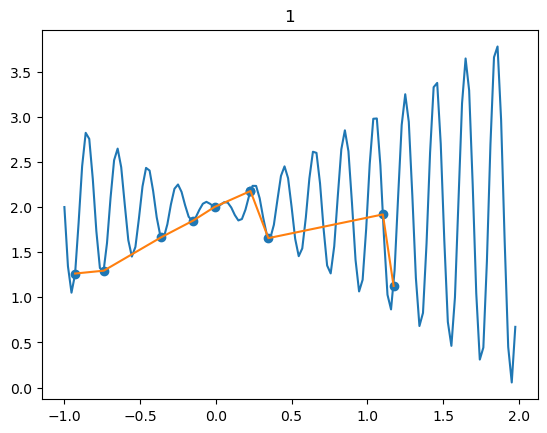

In [18]:
##Sorting the points so that the profile lines are neat and not haphazard
temp = np.argsort(individuals)
individuals = np.array(individuals)[temp]
functionValue = np.array(functionValue)[temp]
   
plt.title(generation)
plt.plot(x,y)
plt.scatter(individuals,functionValue)
plt.plot(individuals,functionValue)

In [17]:
##Call the function that forms the next generation
POP = form_Next_Population(POP)
generation += 1